In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import torch

In [ ]:
torch.manual_seed(0)

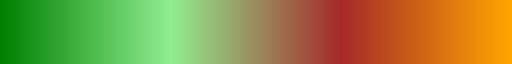

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green", "lightgreen", "brown","orange"])
my_cmap

**Generate Dataset**

In [ ]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)
data = data.astype(np.float32)
labels = labels.astype(np.int64)
print(data)
print(labels)
print(data.shape, labels.shape)

[[-8.55504    7.064618 ]
 [-6.1375318 -6.580817 ]
 [-6.3213005 -6.8041043]
 ...
 [ 3.69048    4.6055517]
 [-7.4891396 -7.067081 ]
 [-9.400496   7.114301 ]]
[3 2 2 1 1 2 1 2 2 1 1 3 0 2 2 2 0 0 0 1 1 3 3 3 1 1 0 0 2 1 2 2 2 0 0 3 2
 1 3 3 1 2 1 3 1 3 0 1 3 1 2 0 1 3 0 3 0 0 0 2 2 0 2 3 1 0 2 2 1 0 3 0 1 2
 1 3 1 0 1 0 2 0 0 0 1 3 2 2 0 0 0 0 1 1 3 1 3 0 1 2 1 3 3 0 3 1 1 0 2 0 3
 2 1 1 1 1 2 3 2 1 0 2 3 1 3 2 1 3 2 1 0 2 1 3 1 3 0 2 1 1 0 0 3 3 3 1 1 0
 0 0 0 3 2 2 0 1 0 1 1 3 2 0 1 2 0 0 1 2 3 2 1 0 0 1 0 3 2 3 2 3 1 1 0 2 0
 2 1 3 0 2 1 0 1 1 0 3 2 2 2 3 0 2 1 0 1 1 2 0 1 2 2 3 2 2 1 0 2 0 3 1 3 3
 2 0 3 0 1 2 2 0 0 2 0 3 2 2 3 2 2 1 2 3 2 1 3 0 1 0 1 1 1 1 3 1 1 2 0 2 2
 1 1 1 3 1 3 3 2 1 0 3 1 0 1 2 0 3 1 3 2 1 3 2 3 1 2 0 0 2 0 3 3 0 2 2 2 0
 2 2 2 0 2 3 2 3 0 2 3 1 3 3 2 3 3 1 2 3 1 0 3 3 2 2 2 1 3 2 0 2 0 0 2 2 3
 3 2 0 3 1 3 1 3 2 2 1 0 1 3 3 0 0 0 0 0 1 0 0 2 1 0 3 1 2 2 1 3 1 3 3 3 2
 1 1 1 1 0 1 0 2 1 0 2 1 3 1 1 3 0 3 2 3 2 0 3 0 3 3 2 1 1 1 0 3 0 1 1 3 1
 0 0 3 1 0 3 2 3 2 

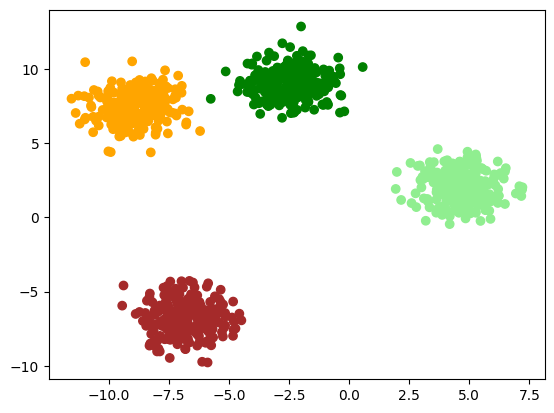

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, labels.shape)

(800, 2) (200, 2) (1000,)


**Using torch tensors and autograd**

In [ ]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

torch.Size([800, 2]) torch.Size([800]) torch.Size([200, 2]) torch.Size([200])


In [ ]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4)
  return h2

In [ ]:
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0])
print(y_hat,"\n",y)
(-y_hat[range(y_hat.shape[0]), y].log()).mean().item()
(torch.argmax(y_hat, dim=1) == y).float().mean().item()

tensor([[0.1000, 0.2000, 0.3000, 0.4000],
        [0.8000, 0.1000, 0.0500, 0.0500]]) 
 tensor([2, 0])


0.5

In [ ]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [ ]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

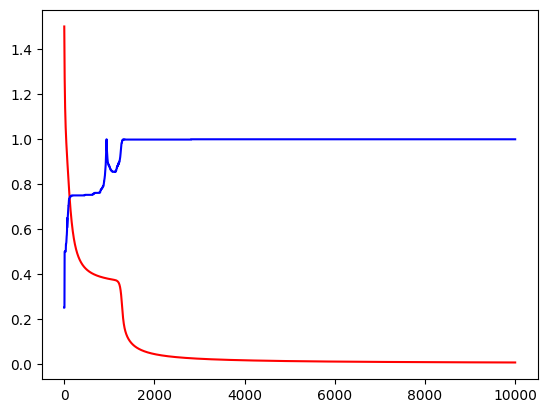

Loss before training 1.502445936203003
Loss after training 0.005871015600860119
Accuracy before training tensor(0.2500)
Accuracy after training tensor(1.)


In [ ]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)
weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)
learning_rate = 0.2
epochs = 10000
X_train = X_train.float()
Y_train = Y_train.long()
loss_arr = []
acc_arr = []
for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])
print('Accuracy before training', acc_arr[0])
print('Accuracy after training', acc_arr[-1])

In [ ]:
import torch.nn.functional as F

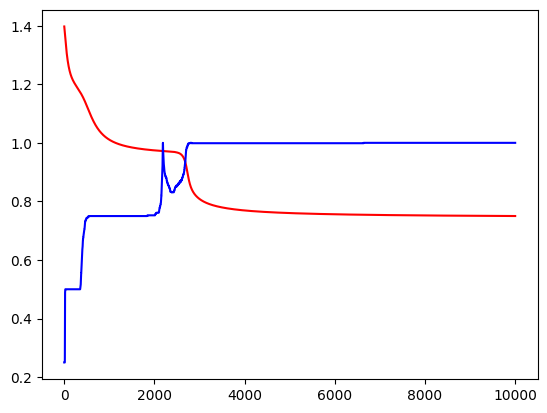

Loss before training 1.3973548412322998
Loss after training 0.7501035332679749
Accuracy before training tensor(0.2500)
Accuracy after training tensor(1.)


In [ ]:
torch.manual_seed(0)

weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)
weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)
learning_rate = 0.2
epochs = 10000
loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])
print('Accuracy before training', acc_arr[0])
print('Accuracy after training', acc_arr[-1])

In [ ]:
import torch.nn as nn

In [ ]:
class FirstNetwork(nn.Module):

 def __init__(self):
  super().__init__()
  torch.manual_seed(0)
  self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
  self.bias1 = nn.Parameter(torch.zeros(2))
  self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
  self.bias2 = nn.Parameter(torch.zeros(4))

 def forward(self, X):
  a1 = torch.matmul(X, self.weights1) + self.bias1
  h1 = a1.sigmoid()
  a2 = torch.matmul(h1, self.weights2) + self.bias2
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2


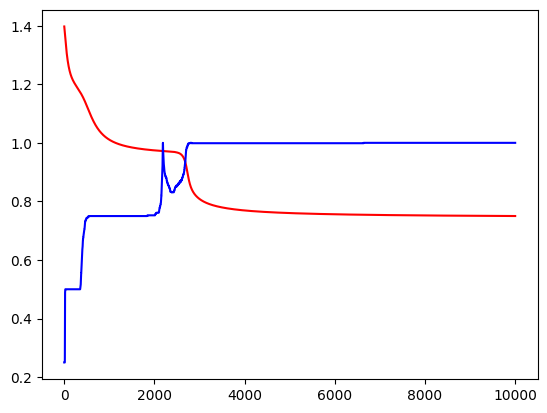

Loss before training 1.3973548412322998
Loss after training 0.7501035332679749
Accuracy before training tensor(0.2500)
Accuracy after training tensor(1.)


In [ ]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])
print('Accuracy before training', acc_arr[0])
print('Accuracy after training', acc_arr[-1])

In [ ]:
fn = FirstNetwork()
fit()

**Using NN.Linear and Optim**

In [ ]:
class FirstNetwork_v1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)

  def forward(self, X):
   a1 = self.lin1(X)
   h1 = a1.sigmoid()
   a2 = self.lin2(h1)
   h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
   return h2

In [ ]:

fn = FirstNetwork_v1()
fit()

In [ ]:
from torch import optim

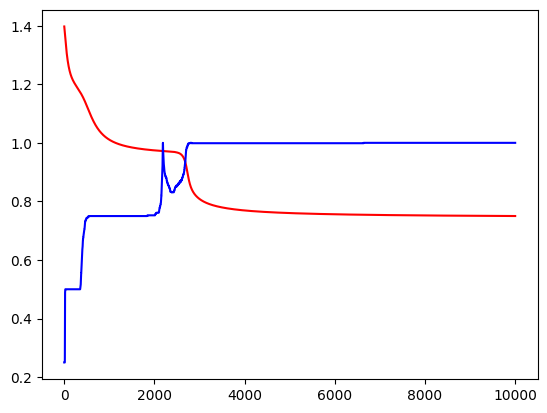

Loss before training 1.3973548412322998
Loss after training 0.7501035332679749
Accuracy before training tensor(0.2500)
Accuracy after training tensor(1.)


In [ ]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    loss.backward()
    opt.step()
    opt.zero_grad()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])
print('Accuracy before training', acc_arr[0])
print('Accuracy after training', acc_arr[-1])


In [ ]:
fn = FirstNetwork_v1()
fit_v1()


**Using NN.Sequential**

In [ ]:

class FirstNetwork_v2(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2),
        nn.Sigmoid(),
        nn.Linear(2, 4),
        nn.Softmax()
 )
  def forward(self, X):
    return self.net(X)


In [ ]:
fn = FirstNetwork_v2()
fit_v1()

In [ ]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):

  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item()


In [ ]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.7556746006011963

**Running it on GPUs**

In [ ]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)


Final loss 1.421441912651062
Time taken 1.3778104782104492


In [ ]:
class FirstNetwork_v3(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4),
        nn.Sigmoid(),
        nn.Linear(1024*4, 4),
        nn.Softmax()
 )
  def forward(self, X):
    return self.net(X)


In [ ]:
device = torch.device("cpu")
X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3743454217910767
Time taken 32.36965584754944
